## Importar librerias

In [73]:
import pandas as pd
import statistics as stc
import numpy as npy
import matplotlib.pyplot as plt
import plotly.express as px


In [74]:
FILENAME ='datasets/games_details.csv'

# columnas con las que se trabajaran
columns = ['GAME_ID',
          'TEAM_CITY',
          'PLAYER_NAME',
          'START_POSITION',
          'MIN',
          'OREB',
          'DREB',
          'REB',
          'AST',
          'BLK',
          'PF',
          'PTS',
          'PLUS_MINUS']

df = pd.read_csv(FILENAME, usecols =columns)

df.head()

,GAME_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,OREB,DREB,REB,AST,BLK,PF,PTS,PLUS_MINUS
0,22200477,San Antonio,Romeo Langford,F,18:06,1.0,1.0,2.0,0.0,0.0,5.0,2.0,-2.0
1,22200477,San Antonio,Jeremy Sochan,F,31:01,6.0,3.0,9.0,6.0,0.0,1.0,23.0,-14.0
2,22200477,San Antonio,Jakob Poeltl,C,21:42,1.0,3.0,4.0,1.0,0.0,4.0,13.0,-4.0
3,22200477,San Antonio,Devin Vassell,G,30:20,0.0,9.0,9.0,5.0,0.0,1.0,10.0,-18.0
4,22200477,San Antonio,Tre Jones,G,27:44,0.0,2.0,2.0,3.0,0.0,2.0,19.0,0.0


## Mostrar informacion basica del dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   GAME_ID         668628 non-null  int64  
 1   TEAM_CITY       668628 non-null  object 
 2   PLAYER_NAME     668628 non-null  object 
 3   START_POSITION  255765 non-null  object 
 4   MIN             558938 non-null  object 
 5   OREB            558938 non-null  float64
 6   DREB            558938 non-null  float64
 7   REB             558938 non-null  float64
 8   AST             558938 non-null  float64
 9   BLK             558938 non-null  float64
 10  PF              558938 non-null  float64
 11  PTS             558938 non-null  float64
 12  PLUS_MINUS      535277 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 66.3+ MB


## Describe los datos de manera estadististica

In [76]:
df.describe()

,GAME_ID,OREB,DREB,REB,AST,BLK,PF,PTS,PLUS_MINUS
count,6.686280e+05,558938.000000,558938.000000,558938.00000,558938.000000,558938.000000,558938.000000,558938.000000,535277.000000
mean,2.171771e+07,1.024212,3.033798,4.05801,2.103958,0.460339,1.999538,9.688218,-0.000488
std,5.656289e+06,1.397830,2.687384,3.48250,2.475476,0.860962,1.502963,8.082152,10.665573
min,1.030000e+07,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.070003e+07,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120096e+07,1.000000,2.000000,3.00000,1.000000,0.000000,2.000000,8.000000,0.000000
75%,2.180014e+07,2.000000,4.000000,6.00000,3.000000,1.000000,3.000000,14.000000,6.000000
max,5.210021e+07,18.000000,25.000000,31.00000,25.000000,12.000000,15.000000,81.000000,57.000000


## Revisar la cantidad de datos nulos 

In [77]:
df.isnull()

,GAME_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,OREB,DREB,REB,AST,BLK,PF,PTS,PLUS_MINUS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,False,False,False,True,False,False,False,False,False,False,False,False,True
668624,False,False,False,True,False,False,False,False,False,False,False,False,True
668625,False,False,False,True,False,False,False,False,False,False,False,False,True
668626,False,False,False,True,False,False,False,False,False,False,False,False,True


In [80]:
df.isnull().sum().to_frame()

,0
game_id,0
team_city,0
player_name,0
start_position,412863
min,109690
oreb,109690
dreb,109690
reb,109690
ast,109690
blk,109690


In [102]:
df['pts'].fillna(0, inplace=True)
df['reb'].fillna(0, inplace=True)

## Se cambian los nombres de encabezados a minuscula

In [81]:
df.columns = df.columns.str.lower().str.strip()

In [82]:
df.head()

,game_id,team_city,player_name,start_position,min,oreb,dreb,reb,ast,blk,pf,pts,plus_minus
0,22200477,San Antonio,Romeo Langford,F,18:06,1.0,1.0,2.0,0.0,0.0,5.0,2.0,-2.0
1,22200477,San Antonio,Jeremy Sochan,F,31:01,6.0,3.0,9.0,6.0,0.0,1.0,23.0,-14.0
2,22200477,San Antonio,Jakob Poeltl,C,21:42,1.0,3.0,4.0,1.0,0.0,4.0,13.0,-4.0
3,22200477,San Antonio,Devin Vassell,G,30:20,0.0,9.0,9.0,5.0,0.0,1.0,10.0,-18.0
4,22200477,San Antonio,Tre Jones,G,27:44,0.0,2.0,2.0,3.0,0.0,2.0,19.0,0.0


In [83]:

df['player_name'].str.split(' ', expand = True)


,0,1,2,3
0,Romeo,Langford,None,None
1,Jeremy,Sochan,None,None
2,Jakob,Poeltl,None,None
3,Devin,Vassell,None,None
4,Tre,Jones,None,None
...,...,...,...,...
668623,Jordan,Hamilton,None,None
668624,Kenneth,Faried,None,None
668625,Kosta,Koufos,None,None
668626,Timofey,Mozgov,None,None


In [84]:
df['player_name'] = df['player_name'].str.rstrip()
df.head()

,game_id,team_city,player_name,start_position,min,oreb,dreb,reb,ast,blk,pf,pts,plus_minus
0,22200477,San Antonio,Romeo Langford,F,18:06,1.0,1.0,2.0,0.0,0.0,5.0,2.0,-2.0
1,22200477,San Antonio,Jeremy Sochan,F,31:01,6.0,3.0,9.0,6.0,0.0,1.0,23.0,-14.0
2,22200477,San Antonio,Jakob Poeltl,C,21:42,1.0,3.0,4.0,1.0,0.0,4.0,13.0,-4.0
3,22200477,San Antonio,Devin Vassell,G,30:20,0.0,9.0,9.0,5.0,0.0,1.0,10.0,-18.0
4,22200477,San Antonio,Tre Jones,G,27:44,0.0,2.0,2.0,3.0,0.0,2.0,19.0,0.0


In [85]:
df['player_name'].str.split()

0          [Romeo, Langford]
1           [Jeremy, Sochan]
2            [Jakob, Poeltl]
3           [Devin, Vassell]
4               [Tre, Jones]
                 ...        
668623    [Jordan, Hamilton]
668624     [Kenneth, Faried]
668625       [Kosta, Koufos]
668626     [Timofey, Mozgov]
668627          [Ty, Lawson]
Name: player_name, Length: 668628, dtype: object

## Jugadores a travez de los años que han estado en cada equipo

In [86]:
unique_players_by_team = df.drop_duplicates(subset=['team_city', 'player_name'])
unique_player_counts = unique_players_by_team.groupby('team_city').size().reset_index(name='unique_players')
unique_player_counts_sorted = unique_player_counts.sort_values(by='unique_players', ascending=False)
print(unique_player_counts_sorted.to_string(index=False))

                team_city  unique_players
              Los Angeles             382
              New Orleans             285
                Cleveland             282
                  Houston             276
                 New York             266
                  Atlanta             265
                  Memphis             259
               Sacramento             255
             Philadelphia             255
                   Dallas             255
                   Boston             247
                Milwaukee             244
                  Phoenix             242
             Golden State             240
               Washington             238
                Minnesota             233
                  Toronto             232
                    Miami             228
                  Chicago             228
                     Utah             226
                  Orlando             226
                 Portland             224
                Charlotte         

### Jugador con mas apariciones en el dataset

In [87]:
highest_source = df['player_name'].value_counts()
type(highest_source)

pandas.core.series.Series

In [88]:
highest_source.to_frame()

,count
player_name,
LeBron James,1795
Udonis Haslem,1720
Andre Iguodala,1560
Dwight Howard,1541
Kyle Korver,1534
...,...
Nate Williams,1
Anwar Ferguson,1
Jon Horford,1


## Agrupa por nombre de jugador y el total de puntos que ha anotado en el tiempo

In [89]:
total_points_by_player = df.groupby('player_name')['pts'].sum().reset_index().head(20)
print(total_points_by_player.to_string(index=False))

   player_name    pts
   A.J. Guyton    4.0
   A.J. Lawson   18.0
      AJ Green   60.0
    AJ Griffin  334.0
    AJ Hammons   82.0
      AJ Price 1832.0
   Aamir Simms    4.0
  Aaron Brooks 7141.0
   Aaron Craft   12.0
  Aaron Gordon 8075.0
    Aaron Gray 1237.0
Aaron Harrison  119.0
   Aaron Henry   12.0
 Aaron Holiday 2198.0
 Aaron Jackson   13.0
   Aaron McKie  908.0
   Aaron Miles   60.0
 Aaron Nesmith  756.0
 Aaron Wiggins  631.0
Aaron Williams  961.0


## Top 20 de los jugadores de la NBA con mas anotaciones en el tiempo

In [90]:
total_points_by_player_sorted = total_points_by_player.sort_values(by='pts', ascending=False)
top_20_players = total_points_by_player_sorted.head(20)
print(top_20_players.to_string(index=False))

   player_name    pts
  Aaron Gordon 8075.0
  Aaron Brooks 7141.0
 Aaron Holiday 2198.0
      AJ Price 1832.0
    Aaron Gray 1237.0
Aaron Williams  961.0
   Aaron McKie  908.0
 Aaron Nesmith  756.0
 Aaron Wiggins  631.0
    AJ Griffin  334.0
Aaron Harrison  119.0
    AJ Hammons   82.0
      AJ Green   60.0
   Aaron Miles   60.0
   A.J. Lawson   18.0
 Aaron Jackson   13.0
   Aaron Craft   12.0
   Aaron Henry   12.0
   Aamir Simms    4.0
   A.J. Guyton    4.0


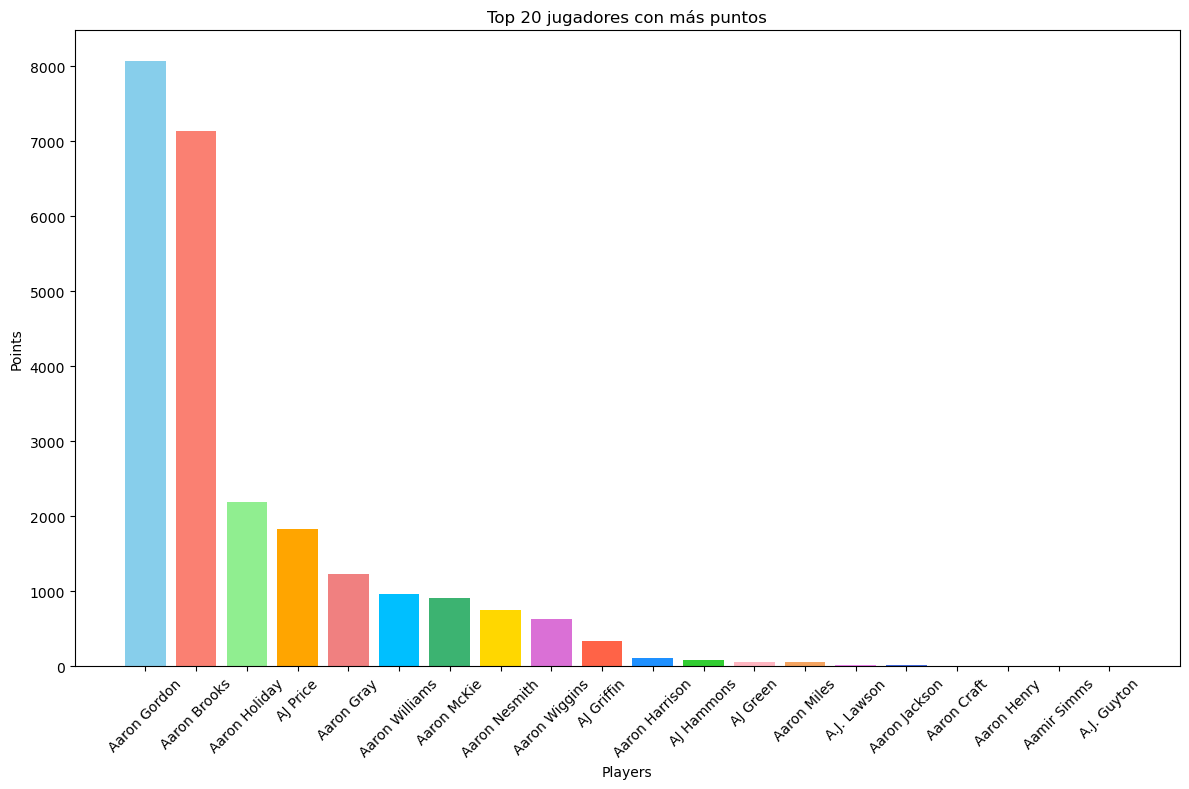

In [91]:

# Obtener los nombres de los jugadores y sus respectivos puntajes
players = top_20_players['player_name']
points = top_20_players['pts']

# Definir una lista de colores para cada barra
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral',
          'deepskyblue', 'mediumseagreen', 'gold', 'orchid', 'tomato',
          'dodgerblue', 'limegreen', 'lightpink', 'sandybrown', 'violet',
          'royalblue', 'palegreen', 'khaki', 'hotpink', 'peru']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(players, points, color=colors)


# Añadir título y etiquetas
plt.title('Top 20 jugadores con más puntos')
plt.xlabel('Players')
plt.ylabel('Points')

# Rotar los nombres de los jugadores para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()

## Top 10 de los equipos mas anotadores

In [92]:
total_points_by_city = df.groupby('team_city')['pts'].sum().reset_index()
total_points_by_city_sorted = total_points_by_city.sort_values(by='pts', ascending=False)
top_10_cities = total_points_by_city_sorted.head(10)
# Imprimir el total de puntos anotados por team_city
print(top_10_cities.to_string(index=False))

   team_city      pts
 Los Angeles 297683.0
Golden State 195194.0
      Boston 191326.0
 San Antonio 190787.0
       Miami 189667.0
      Denver 189364.0
     Phoenix 187900.0
      Dallas 187348.0
     Houston 185594.0
   Cleveland 182103.0


In [93]:
fig = px.sunburst(total_points_by_city, path=['team_city'], values='pts')
fig.update_layout(title_text='Puntos por Equipo')
fig.show()


In [112]:

def encontrar_jugadores_mas_4_rebotes(df):
    # Filtrar los partidos en los que un jugador tiene más de 4 rebotes
    partidos_mas_4_rebotes = df[df['reb'] > 4]

    # Agrupar por game_id y encontrar el jugador con más rebotes en cada partido
    mejor_rebote_por_partido = partidos_mas_4_rebotes.groupby('game_id').apply(lambda x: x.loc[x['reb'].idxmax()])

    return mejor_rebote_por_partido[['game_id', 'player_name', 'reb']]

# Llama a la función para encontrar al jugador con más de 4 rebotes en cada partido
resultado = encontrar_jugadores_mas_4_rebotes(df)

# Eliminar duplicados de la columna 'game_id'
resultado = resultado.drop_duplicates(subset=['game_id'])


# Limita los resultados a los primeros 20
resultado_limitado = resultado.head(20)

# Imprime el resultado
print(resultado_limitado.to_string(index=False))

 game_id       player_name  reb
10300001    Ben Handlogten  6.0
10300002         Pau Gasol  8.0
10300003     Carlos Boozer 14.0
10300004     Raef LaFrentz  9.0
10300005     Zach Randolph  8.0
10300007       Loren Woods 11.0
10300008      Shawn Marion 11.0
10300009       Elton Brand 10.0
10300010       Etan Thomas  7.0
10300011     Obinna Ekezie 13.0
10300012     Primoz Brezec  7.0
10300014    Antoine Walker  6.0
10300016   Bostjan Nachbar  9.0
10300017        David West 11.0
10300018     Antonio Davis 11.0
10400064 Clifford Robinson 10.0
10400065     Primoz Brezec 13.0
10400066     Kevin Garnett  9.0
10400067  Curtis Borchardt  9.0
10400068      Al Jefferson  6.0


In [113]:
def encontrar_jugadores_mas_2_rebotes_y_mas_6_pts(df):
    # Eliminar duplicados en game_id
    df_sin_duplicados = df.drop_duplicates(subset='game_id')
    
    # Filtrar los partidos en los que un jugador tiene más de 2 rebotes y más de 6 puntos
    jugadores_filtrados = df_sin_duplicados[(df_sin_duplicados['reb'] > 2) & (df_sin_duplicados['pts'] > 6)]

    try:
        # Agrupar por game_id y encontrar el jugador con más rebotes y más puntos en cada partido
        mejor_jugador_por_partido = jugadores_filtrados.groupby('game_id').apply(lambda x: x.loc[(x['reb'].idxmax()) | (x['pts'].idxmax())])

        return mejor_jugador_por_partido[['game_id', 'player_name', 'reb', 'pts']]
    except KeyError as e:
        print(f"Error: {e}")

# Llama a la función para encontrar a los jugadores con más de 2 rebotes y más de 6 puntos en cada partido
resultado = encontrar_jugadores_mas_2_rebotes_y_mas_6_pts(df)

# Limita los resultados a los primeros 50 datos
resultado_limitado = resultado.head(50)

# Imprime el resultado limitado
print(resultado_limitado.to_string(index=False))

 game_id       player_name  reb  pts
10300004     Danny Fortson  4.0 10.0
10300008 Amar'e Stoudemire  3.0 25.0
10300009     Bobby Jackson  3.0 10.0
10300012     Al Harrington  6.0 13.0
10300014    Antoine Walker  6.0 10.0
10400068      Al Jefferson  6.0  7.0
10400069        Brian Cook  4.0 13.0
10400070     Al Harrington  4.0  8.0
10400071   Antonio McDyess  6.0  9.0
10400077     Allen Iverson  7.0 27.0
10400081   Antonio McDyess  9.0 13.0
10400082     Bobby Simmons  9.0 15.0
10400084    Antawn Jamison  6.0 16.0
10400087  Damon Stoudamire  4.0 10.0
10400094      Andre Miller  6.0  8.0
10400095 Amar'e Stoudemire  9.0 13.0
10400098      Al Jefferson  4.0  8.0
10400105      Adonal Foyle  6.0  7.0
10400107   Alonzo Mourning  5.0 12.0
10400113     Bobby Simmons  7.0 19.0
10400114        Chris Bosh  7.0 13.0
10400115   Austin Croshere  5.0 11.0
10500001    Antawn Jamison  3.0 13.0
10500003     Al Harrington  4.0  7.0
10500013     Charles Smith  4.0  8.0
10500014     Allen Iverson  4.0 27.0
1

## se cambia el valor de dato nulos para mejor manejo de la informacion

In [103]:
nulos_pts = df['reb'].isnull().sum()
print("Número de valores nulos en la columna 'pts':", nulos_pts)

Número de valores nulos en la columna 'pts': 0


In [104]:
nulos_pts = df['pts'].isnull().sum()
print("Número de valores nulos en la columna 'pts':", nulos_pts)

Número de valores nulos en la columna 'pts': 0
